In [ ]:
№1

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, SpatialDropout1D   

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 256
embedding_dim = 32
units = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)


17464789/17464789 [==============================] - 4s 0us/step


In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [5]:
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(units=units, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [14]:
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

Epoch 1/10
69/69 [==============================] - 13s 185ms/step - loss: 0.0584 - acc: 0.9809 - val_loss: 0.6998 - val_acc: 0.8388
Epoch 2/10
69/69 [==============================] - 13s 182ms/step - loss: 0.0585 - acc: 0.9807 - val_loss: 0.5242 - val_acc: 0.8528
Epoch 3/10
69/69 [==============================] - 13s 186ms/step - loss: 0.0504 - acc: 0.9837 - val_loss: 0.5503 - val_acc: 0.8491
Epoch 4/10
69/69 [==============================] - 13s 182ms/step - loss: 0.0500 - acc: 0.9843 - val_loss: 0.5541 - val_acc: 0.8460
Epoch 5/10
69/69 [==============================] - 13s 183ms/step - loss: 0.0424 - acc: 0.9861 - val_loss: 0.6643 - val_acc: 0.7817
Epoch 6/10
69/69 [==============================] - 13s 193ms/step - loss: 0.0448 - acc: 0.9850 - val_loss: 0.5627 - val_acc: 0.8463
Epoch 7/10
69/69 [==============================] - 14s 207ms/step - loss: 0.0357 - acc: 0.9876 - val_loss: 0.7069 - val_acc: 0.8539
Epoch 8/10
69/69 [==============================] - 15s 214ms/step - 

In [15]:
def visualisation(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
    plt.title('Точність тренування і валідації')  
    plt.legend()  

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  
    plt.title('Втрати тренування і валідації')  
    plt.legend()  

    plt.show()  

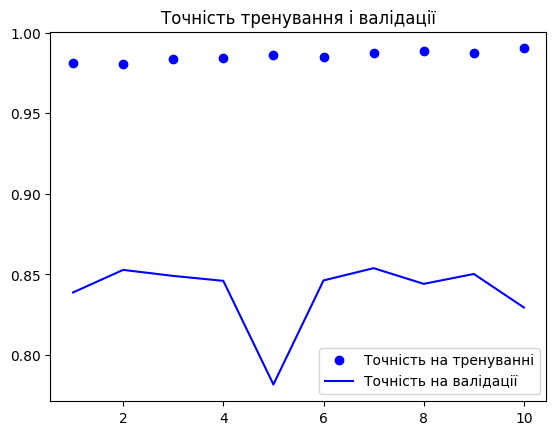

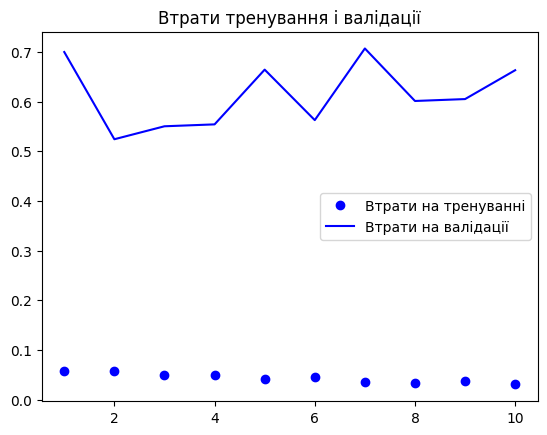

In [16]:
visualisation(history)

In [17]:
def prediction(model):
    predictions = model.predict(input_test)

    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

In [18]:

prediction(model)

782/782 [==============================] - 17s 21ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 18s 24ms/step - loss: 0.6691 - acc: 0.8298
Test Loss: 0.6690865755081177
Test Accuracy: 0.829800009727478


№2

In [19]:
from keras.layers import LSTM

In [20]:
model2 = Sequential()

model2.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

In [21]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 500, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
69/69 [==============================] - 117s 2s/step - loss: 0.6743 - acc: 0.5922 - val_loss: 0.5660 - val_acc: 0.7481
Epoch 2/10
69/69 [==============================] - 123s 2s/step - loss: 0.4999 - acc: 0.7719 - val_loss: 0.3991 - val_acc: 0.8395
Epoch 3/10
69/69 [==============================] - 127s 2s/step - loss: 0.3723 - acc: 0.8445 - val_loss: 0.3531 - val_acc: 0.8569
Epoch 4/10
69/69 [==============================] - 128s 2s/step - loss: 0.3138 - acc: 0.8755 - val_loss: 0.3035 - val_acc: 0.8760
Epoch 5/10
69/69 [==============================] - 131s 2s/step - loss: 0.2778 - acc: 0.8913 - val_loss: 0.2926 - val_acc: 0.8825
Epoch 6/10
69/69 [==============================] - 132s 2s/step - loss: 0.2450 - acc: 0.9076 - val_loss: 0.3805 - val_acc: 0.8357
Epoch 7/10
69/69 [==============================] - 140s 2s/step - loss: 0.2238 - acc: 0.9167 - val_loss: 0.3183 - val_acc: 0.8769
Epoch 8/10
69/69 [==============================] - 141s 2s/step - loss: 0.2122 - a

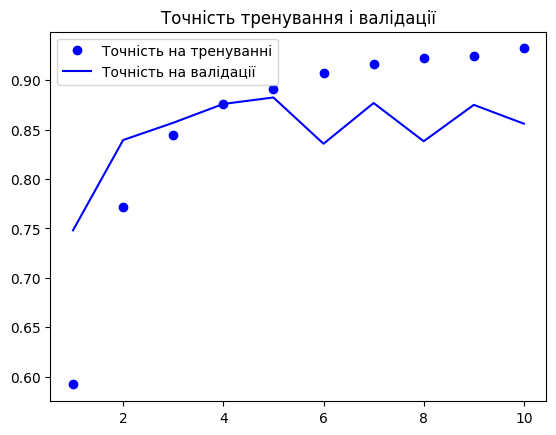

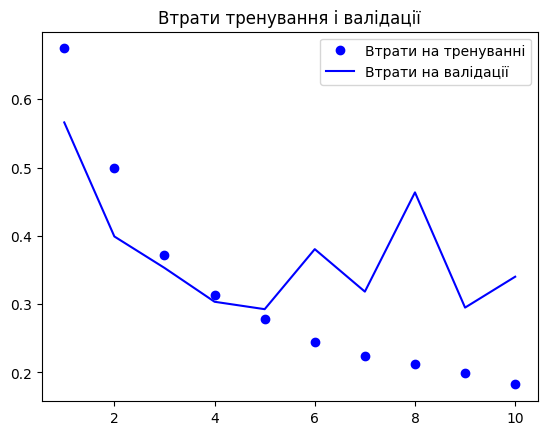

In [22]:
history2 = model2.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history2)

In [23]:
prediction(model2)

782/782 [==============================] - 33s 42ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 35s 45ms/step - loss: 0.3508 - acc: 0.8526
Test Loss: 0.3507903814315796
Test Accuracy: 0.8526399731636047


 №3

In [24]:
from keras.layers import Bidirectional
model3 = Sequential()

model3.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model3.add(SpatialDropout1D(0.2))
model3.add(Bidirectional(LSTM(32, dropout=0.2)))
model3.add(Dense(1, activation='sigmoid'))

In [25]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 spatial_dropout1d_2 (Spati  (None, 500, 32)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
69/69 [==============================] - 223s 3s/step - loss: 0.6919 - acc: 0.5275 - val_loss: 0.6887 - val_acc: 0.6228
Epoch 2/10
69/69 [==============================] - 207s 3s/step - loss: 0.6157 - acc: 0.6837 - val_loss: 0.5308 - val_acc: 0.7368
Epoch 3/10
69/69 [==============================] - 217s 3s/step - loss: 0.4541 - acc: 0.8039 - val_loss: 0.4104 - val_acc: 0.8155
Epoch 4/10
69/69 [==============================] - 220s 3s/step - loss: 0.3639 - acc: 0.8489 - val_loss: 0.3417 - val_acc: 0.8563
Epoch 5/10
69/69 [==============================] - 217s 3s/step - loss: 0.3091 - acc: 0.8763 - val_loss: 0.3599 - val_acc: 0.8533
Epoch 6/10
69/69 [==============================] - 208s 3s/step - loss: 0.2735 - acc: 0.8938 - val_loss: 0.3372 - val_acc: 0.8561
Epoch 7/10
69/69 [==============================] - 207s 3s/step - loss: 0.2470 - acc: 0.9067 - val_loss: 0.3887 - val_acc: 0.8359
Epoch 8/10
69/69 [==============================] - 223s 3s/step - loss: 0.2245 - a

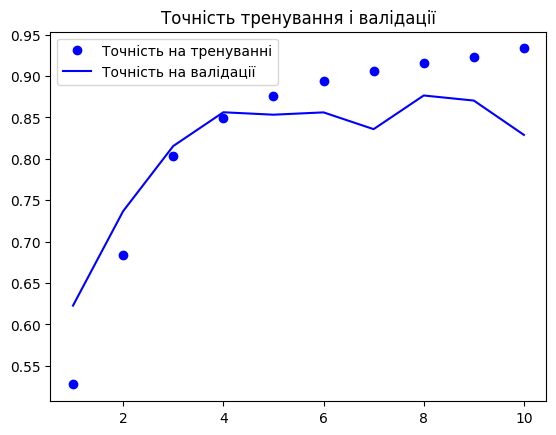

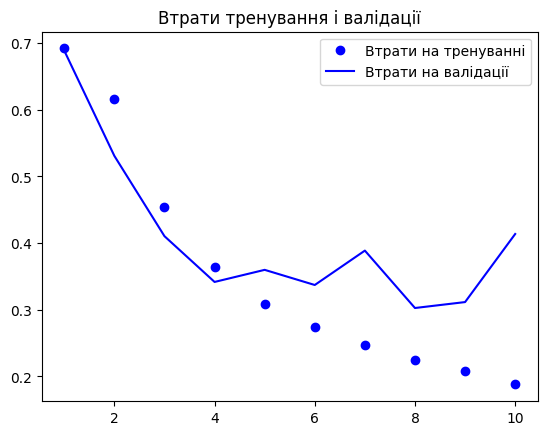

In [26]:
history3 = model3.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history3)

In [27]:
prediction(model3)

782/782 [==============================] - 43s 54ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 48s 62ms/step - loss: 0.4284 - acc: 0.8250
Test Loss: 0.4284273386001587
Test Accuracy: 0.824999988079071


№4

In [28]:
model4 = Sequential()

model4.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model4.add(SpatialDropout1D(0.2))

model4.add(Bidirectional(LSTM(32, dropout=0.2, return_sequences=True)))
model4.add(Bidirectional(LSTM(32, dropout=0.2)))

model4.add(Dense(1, activation='sigmoid'))

In [29]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           320000    
                                                                 
 spatial_dropout1d_3 (Spati  (None, 500, 32)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 500, 64)           16640     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

Epoch 1/10
69/69 [==============================] - 686s 10s/step - loss: 0.6923 - acc: 0.5159 - val_loss: 0.6891 - val_acc: 0.5428
Epoch 2/10
69/69 [==============================] - 662s 10s/step - loss: 0.5779 - acc: 0.7035 - val_loss: 0.4555 - val_acc: 0.8051
Epoch 3/10
69/69 [==============================] - 730s 11s/step - loss: 0.4028 - acc: 0.8264 - val_loss: 0.3820 - val_acc: 0.8441
Epoch 4/10
69/69 [==============================] - 727s 11s/step - loss: 0.3188 - acc: 0.8720 - val_loss: 0.3457 - val_acc: 0.8515
Epoch 5/10
69/69 [==============================] - 733s 11s/step - loss: 0.2741 - acc: 0.8928 - val_loss: 0.3097 - val_acc: 0.8723
Epoch 6/10
69/69 [==============================] - 782s 11s/step - loss: 0.2408 - acc: 0.9080 - val_loss: 0.3067 - val_acc: 0.8793
Epoch 7/10
69/69 [==============================] - 772s 11s/step - loss: 0.2134 - acc: 0.9193 - val_loss: 0.3567 - val_acc: 0.8723
Epoch 8/10
69/69 [==============================] - 794s 12s/step - loss: 0.

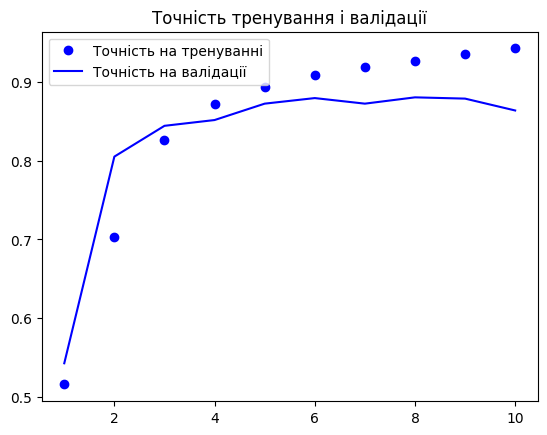

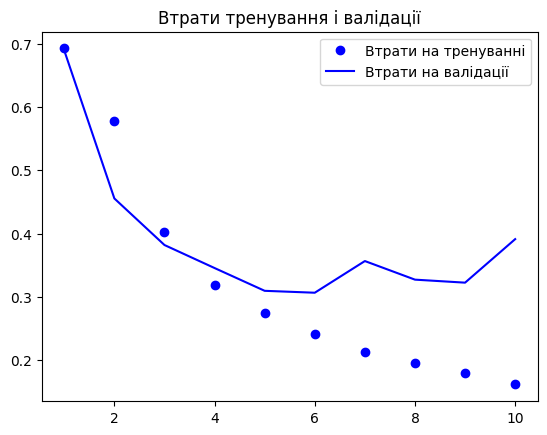

In [30]:
history4 = model4.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history4)

In [31]:
prediction(model4)

782/782 [==============================] - 91s 112ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 101s 130ms/step - loss: 0.4017 - acc: 0.8598
Test Loss: 0.4016795754432678
Test Accuracy: 0.8597599864006042


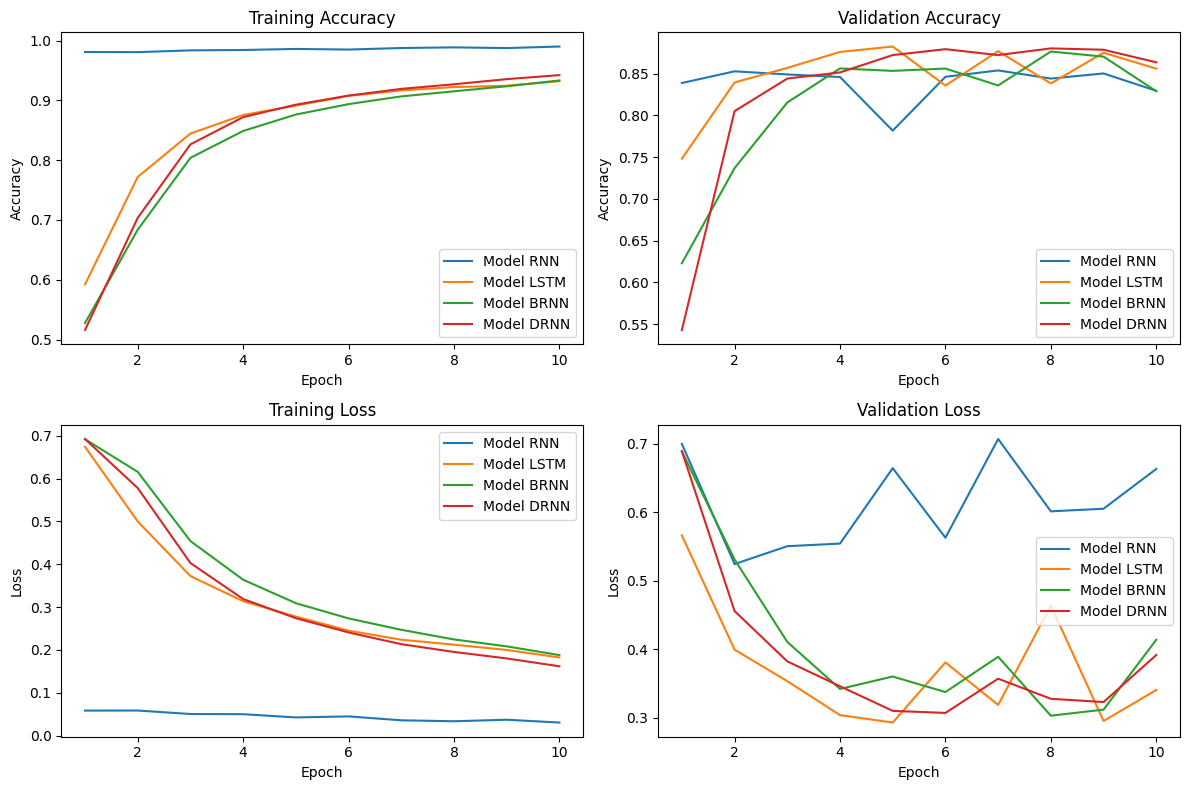

In [32]:
epochs = range(1, len(history.history['acc']) + 1)
epochs2 = range(1, len(history2.history['acc']) + 1)
epochs3 = range(1, len(history3.history['acc']) + 1)
epochs4 = range(1, len(history4.history['acc']) + 1)

# Створення сітки графіків 2x2
plt.figure(figsize=(12, 8))

# Графік 1: Точність на тренувальних данних
plt.subplot(2, 2, 1)
plt.plot(epochs, history.history['acc'], label='Model RNN')
plt.plot(epochs2, history2.history['acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['acc'], label='Model DRNN')

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 2: Точність на валідаційних данних
plt.subplot(2, 2, 2)
plt.plot(epochs, history.history['val_acc'], label='Model RNN')
plt.plot(epochs2, history2.history['val_acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_acc'], label='Model DRNN')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 3: Втрати на тренувальних данних
plt.subplot(2, 2, 3)
plt.plot(epochs, history.history['loss'], label='Model RNN')
plt.plot(epochs2, history2.history['loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['loss'], label='Model DRNN')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Графік 4: Втрати на валідаційних данних
plt.subplot(2, 2, 4)
plt.plot(epochs, history.history['val_loss'], label='Model RNN')
plt.plot(epochs2, history2.history['val_loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_loss'], label='Model DRNN')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()